In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load csv file
ethnicitiesByAgesSuicidesDf = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Group Project/Datasets/years_ethnicities_agegroupsuicides.csv")

unemploymentRatesDf = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Group Project/Datasets/unemploymentrates.csv")

deathsPerMonthYearDf = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Group Project/Datasets/suicidedeathsbymonthandyear.csv")

#Reading Google Trends
cantPayRentMonthDf = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Group Project/Datasets/google trends/cant_pay_rent.csv")
depressedMonthDf = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Group Project/Datasets/google trends/depressed.csv")
hopelessMonthDf = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Group Project/Datasets/google trends/hopeless.csv")

howToKillMyselfMonthDf = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Group Project/Datasets/google trends/how_to_kill_myself.csv")
therapistsNearMeMonthDf = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Group Project/Datasets/google trends/therapists_near_me.csv")
unemploymentMonthDf = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Group Project/Datasets/google trends/unemployment.csv")

print(unemploymentRatesDf)

   Year  Jan  Feb  Mar   Apr   May   Jun   Jul  Aug  Sep  Oct  Nov  Dec
0  2018  4.0  4.1  4.0   4.0   3.8   4.0   3.8  3.8  3.7  3.8  3.8  3.9
1  2019  4.0  3.8  3.8   3.7   3.6   3.6   3.7  3.6  3.5  3.6  3.6  3.6
2  2020  3.6  3.5  4.4  14.8  13.2  11.0  10.2  8.4  7.8  6.9  6.7  6.7
3  2021  6.4  6.2  6.1   6.1   5.8   5.9   5.4  5.1  4.7  4.5  4.2  3.9
4  2022  4.0  3.8  3.7   3.7   3.6   3.6   3.5  3.6  3.5  3.6  3.6  3.5
5  2023  3.5  3.6  3.5   3.4   3.6   3.6   3.5  3.7  3.8  3.9  3.7  3.8


In [ ]:
# beginning of data cleaning
# google trends month list
googleTrendsMonthList =[cantPayRentMonthDf, depressedMonthDf, hopelessMonthDf, howToKillMyselfMonthDf, therapistsNearMeMonthDf, unemploymentMonthDf]

# combining all google trends by month
googleTrendsMonthTable = googleTrendsMonthList[0]

for i in range(1, len(googleTrendsMonthList)):
  googleTrendsMonthTable = pd.merge(googleTrendsMonthTable, googleTrendsMonthList[i], on="Month", how="outer")

# first data table- google trends by month
googleTrendsMonthTable.head(5)

,Month,can't pay rent: (United States),depressed: (United States),hopeless: (United States),how to kill myself: (United States),therapists near me: (United States),unemployment benefits: (United States)
0,2018-01,13,90,69,90,42,5
1,2018-02,9,92,69,89,38,4
2,2018-03,8,89,64,90,36,3
3,2018-04,11,89,62,91,35,3
4,2018-05,8,88,63,90,34,3


In [ ]:
!ls "/content/drive/MyDrive/Colab Notebooks/Group Project/Datasets"


'google trends'			   unemploymentrates.csv
 suicidedeathsbymonthandyear.csv   years_ethnicities_agegroupsuicides.csv


In [ ]:
# drop unuseful columns
ethnicitiesByAgesSuicidesDf=ethnicitiesByAgesSuicidesDf.drop(columns=["Age-adjusted rate", "10-24 Rate", "25-44 Rate", "45-64 Rate", ">=65 Rate"])

# third data table- suicides by year and age , also includes total number of suicides per year
suicidesByYearAndAgeTable = ethnicitiesByAgesSuicidesDf.loc[0:5, ["Year", "Total no. of suicides", "10-24 No. of Suicides", "25-44 No. of Suicides", "45-64 No. of Suicides",">=65 No. of Suicides"]].reset_index(drop=True)

# fourth data table- suicidies by ethnicity and age
suicidesByEthnicityAndAgeTable = ethnicitiesByAgesSuicidesDf.loc[6: , :].reset_index(drop=True)

print(suicidesByYearAndAgeTable.head(5))

print(suicidesByEthnicityAndAgeTable.head(5))

   Year  Total no. of suicides  10-24 No. of Suicides  25-44 No. of Suicides  \
0  2018                  48344                   6807                  15541   
1  2019                  47511                   6488                  15584   
2  2020                  45979                   6643                  15768   
3  2021                  48183                   7126                  16724   
4  2022                  49476                   6533                  16848   

   45-64 No. of Suicides  >=65 No. of Suicides  
0                  16885                9102.0  
1                  16250                9173.0  
2                  14409                9137.0  
3                  14668                9652.0  
4                  15645               10438.0  
   Year                Race and ethnicity  Total no. of suicides  \
0  2018  American Indian or Alaska Native                    545   
1  2019  American Indian or Alaska Native                    546   
2  2020  American Ind

In [ ]:
# remove last three junk rows
deathsPerMonthYearTable = deathsPerMonthYearDf.iloc[0:12, :]

# move last column to be first column
saveColumn = deathsPerMonthYearTable.pop("Month")
deathsPerMonthYearTable.insert(0, "Month", saveColumn)

# fifth data table- deaths per month and year
deathsPerMonthYearTable.head(5)

# ending of data cleaning

,Month,2018,2019,2020,2021,2022,2023 (Provisional),2024 (Provisional)
0,January,14748,13988.0,14905.0,18313.0,19189.0,19005.0,17942.0
1,February,12686,12892.0,14405.0,16261.0,17541.0,17228.0,16067.0
2,March,13926,14220.0,15318.0,18366.0,18753.0,18953.0,16664.0
3,April,13275,13481.0,15396.0,18742.0,17424.0,18754.0,16291.0
4,May,14025,14475.0,18085.0,18987.0,18473.0,19164.0,16885.0


#Exploratory Data Analysis

 We decided to compare the rate of suicide to years/months, race/ethnicity, unemployment rates, and google trends throughout the years. July seems to be the most prominent month of people committing suicide. The higher the unemployment rate, the higher the suicide rates. For race/ethnicity, the group with the highest suicide rates are within the white community. Additionally, in one of the visualizations utilizing the google trends data, we noticed it is common for individuals to search “Hopeless”, “Depressed”, and “Therapists Near Me” in the same months especially from 2022 to 2023. So far, traditional/economic data sets seem to give more insight to suicide rates than google trends have.

/tmp/ipython-input-4173475029.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ethnicitiesByAgesSuicidesDf,


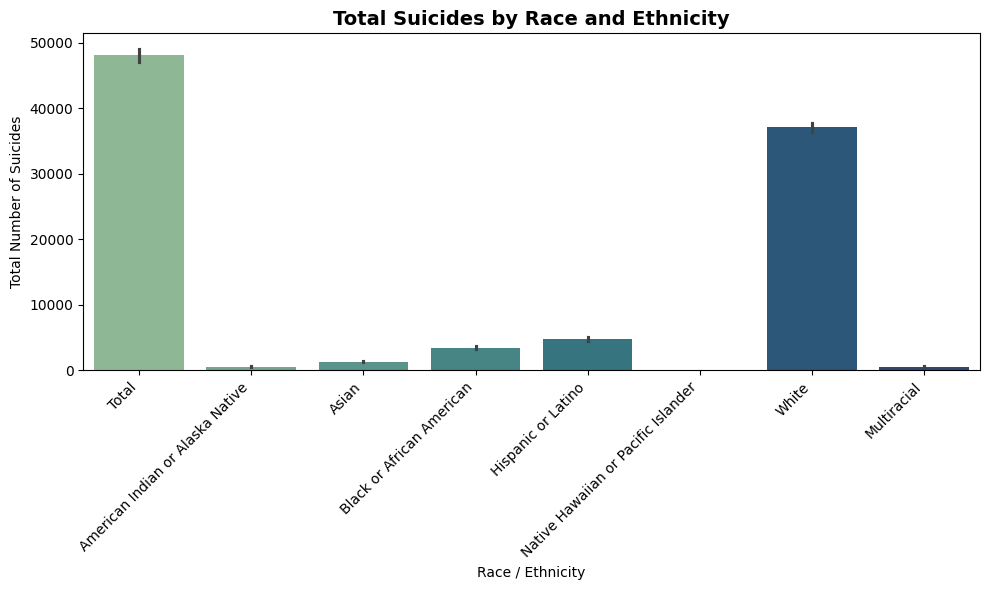

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=ethnicitiesByAgesSuicidesDf,
            x='Race and ethnicity', y='Total no. of suicides',
            palette='crest')

plt.title("Total Suicides by Race and Ethnicity", fontsize=14, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Race / Ethnicity")
plt.ylabel("Total Number of Suicides")
plt.tight_layout()
plt.show()


In [ ]:
# reshape unemployment data to long format
unemployment_long = unemploymentRatesDf.melt(
    id_vars='Year',
    var_name='Month',
    value_name='UnemploymentRate'
)


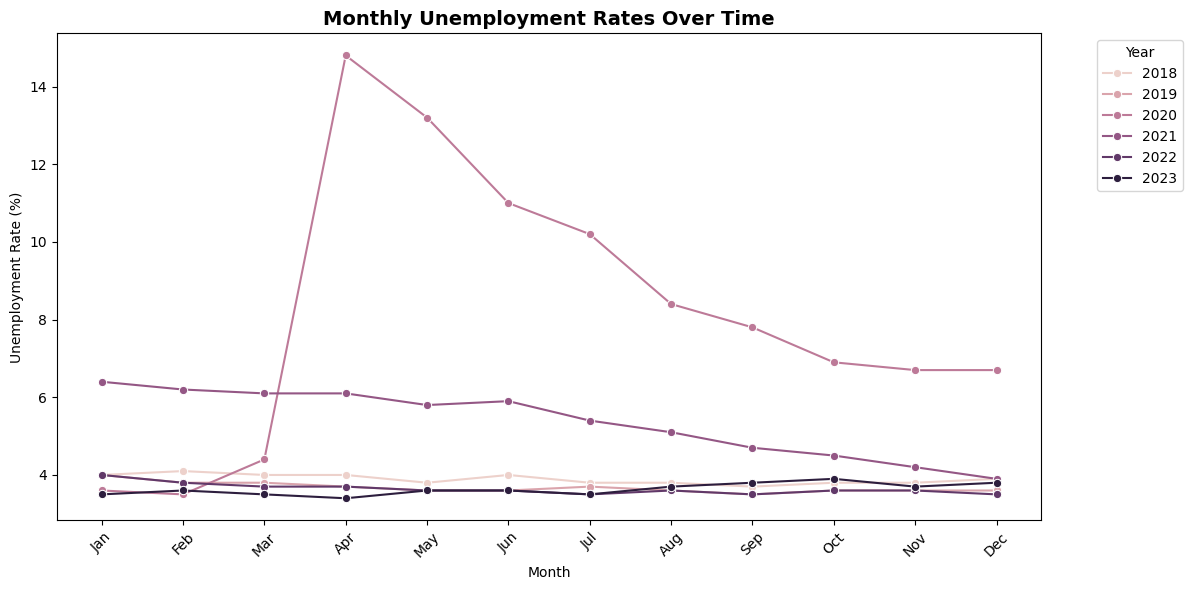

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=unemployment_long, x='Month', y='UnemploymentRate',hue='Year', marker='o')
plt.title("Monthly Unemployment Rates Over Time", fontsize=14, weight='bold')
plt.xlabel("Month")
plt.ylabel("Unemployment Rate (%)")
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
unemployment_long = unemploymentRatesDf.melt(
    id_vars='Year',
    var_name='Month',
    value_name='UnemploymentRate'
)


In [ ]:
# map short month names to full names
month_map = {
    'Jan': 'January', 'Feb': 'February', 'Mar': 'March', 'Apr': 'April',
    'May': 'May', 'Jun': 'June', 'Jul': 'July', 'Aug': 'August',
    'Sep': 'September', 'Oct': 'October', 'Nov': 'November', 'Dec': 'December'
}
unemployment_long['Month'] = unemployment_long['Month'].replace(month_map)


In [ ]:
unemployment_long['Year'] = unemployment_long['Year'].astype(str)

# Build ordered months (full names)
months = ['January','February','March','April','May','June',
          'July','August','September','October','November','December']

# Filter unemployment for 2023 and enforce month order
unemployment_2023 = (
    unemployment_long[unemployment_long['Year'] == '2023']
    .assign(Month=lambda d: pd.Categorical(d['Month'], categories=months, ordered=True))
    .sort_values('Month')
    .reset_index(drop=True)
)

# Make sure suicides column is numeric (handles commas etc.)
deathsPerMonthYearDf['2023 (Provisional)'] = (
    deathsPerMonthYearDf['2023 (Provisional)']
        .astype(str).str.replace(',', '', regex=False)
        .replace({'': None})
)
deathsPerMonthYearDf['2023 (Provisional)'] = pd.to_numeric(
    deathsPerMonthYearDf['2023 (Provisional)'], errors='coerce'
)

# Ensure Month is a clean string (not float/NaN) and categorical order is preserved
deathsPerMonthYearDf['Month'] = pd.Categorical(deathsPerMonthYearDf['Month'], categories=months, ordered=True)
deathsPerMonthYearDf['Month'] = deathsPerMonthYearDf['Month'].astype(str)

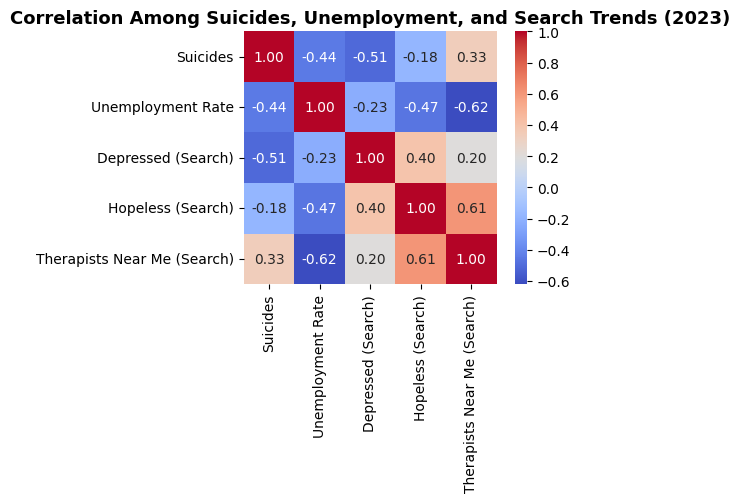

In [ ]:
# ensure all series use the same 12-month structure
months = ['January','February','March','April','May','June',
          'July','August','September','October','November','December']

corr_df = pd.DataFrame({
    'Month': months,
    'Suicides': deathsPerMonthYearDf['2023 (Provisional)'].values[:12],
    'Unemployment Rate': unemployment_2023['UnemploymentRate'].values[:12],
    'Depressed (Search)': depressedMonthDf['depressed: (United States)'].tail(12).values,
    'Hopeless (Search)': hopelessMonthDf['hopeless: (United States)'].tail(12).values,
    'Therapists Near Me (Search)': therapistsNearMeMonthDf['therapists near me: (United States)'].tail(12).values
})

# compute correlation
corr = corr_df.drop(columns='Month').corr()

# plot
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Among Suicides, Unemployment, and Search Trends (2023)', fontsize=13, weight='bold')
plt.tight_layout()
plt.show()


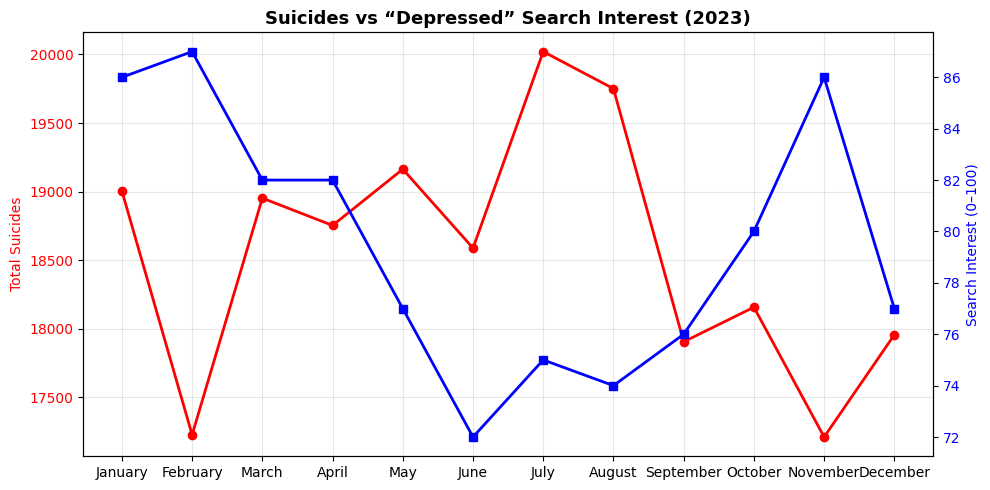

In [ ]:
plt.figure(figsize=(10,5))

# suicides (left y-axis)
ax1 = plt.gca()
ax1.plot(deathsPerMonthYearDf['Month'], deathsPerMonthYearDf['2023 (Provisional)'],
         color='red', marker='o', linewidth=2, label='Suicides')
ax1.set_ylabel('Total Suicides', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# google trend data- use categorical month names
# ensure same month order and names as suicide data
trend_df = depressedMonthDf.copy()
trend_df = trend_df.tail(12)
trend_df['Month'] = [
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
]

ax2 = ax1.twinx()
ax2.plot(trend_df['Month'], trend_df['depressed: (United States)'],
         color='blue', marker='s', linewidth=2, label='Search Interest: "Depressed"')
ax2.set_ylabel('Search Interest (0–100)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# clean formatting
plt.title('Suicides vs “Depressed” Search Interest (2023)', fontsize=13, weight='bold')
plt.xticks(rotation=30, ha='right')
ax1.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


One of the visualizations we had are comparing the suicide rates versus google searches for being depressed or having depression. The findings of this visualization goes against our original hypothesis, which refers to the google search trends providing deeper insight because this visualization shows the opposite. Although there are some points on the graph that show similarities, a lot of them show they have no correlation, in fact, for a lot of the points, the higher the depression searches, the lower the suicide rates.

ML MODELS (BASELINE REGRESSION)

MAE (Baseline mean): 2324.3

=== LinearRegression ===
MAE: 919.2
R²: 0.755

=== RandomForest ===
MAE: 829.3
R²: 0.729

=== GradientBoosting ===
MAE: 933.3
R²: 0.708

Best model on this data: LinearRegression (R² = 0.755)


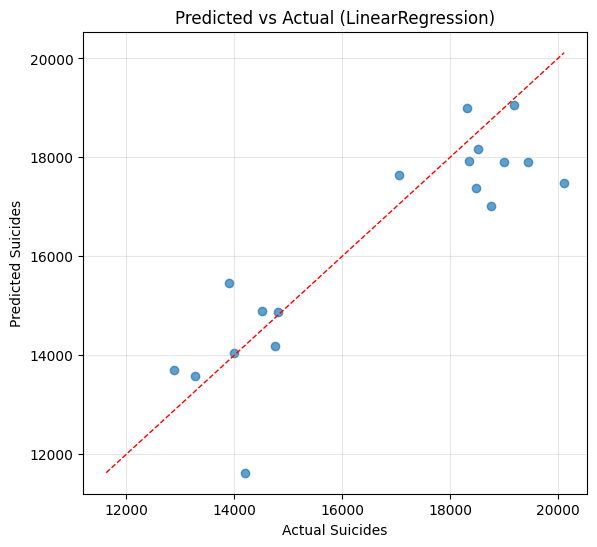

In [ ]:
deaths_long = deathsPerMonthYearTable.melt(
id_vars='Month',
var_name='Year',
value_name='Suicides'
)
deaths_long.loc[:, 'Suicides'] = pd.to_numeric(deaths_long['Suicides'],errors='coerce')
deaths_long['Year'] = deaths_long['Year'].astype(str)
unemployment_long['Year'] = unemployment_long['Year'].astype(str)

# join suicide + unemployment by month + year
ml_df = deaths_long.merge(
    unemployment_long[['Year', 'Month', 'UnemploymentRate']],
    on=['Year', 'Month'],
    how='inner'
).copy()

#add Google Trends monthly data
gt = googleTrendsMonthTable.copy()


gt['Year'] = gt['Month'].str.slice(0, 4)
gt['MonthNum'] = gt['Month'].str.slice(5, 7).astype(int)

num_to_name = {
    1:'January', 2:'February', 3:'March', 4:'April',
    5:'May', 6:'June', 7:'July', 8:'August',
    9:'September', 10:'October', 11:'November', 12:'December'
}
gt['Month'] = gt['MonthNum'].map(num_to_name)

# keep only needed numeric google trends columns
gt_cols = [
    "can't pay rent: (United States)",
    "depressed: (United States)",
    "hopeless: (United States)",
    "how to kill myself: (United States)",
    "therapists near me: (United States)",
    "unemployment benefits: (United States)"
]
gt = gt[['Year', 'Month'] + gt_cols]

# merge google trends into ml_df
ml_df = ml_df.merge(gt, on=['Year', 'Month'], how='left')

# ensure numeric target/feature + drop missing
ml_df['Suicides'] = pd.to_numeric(ml_df['Suicides'], errors='coerce')
ml_df['UnemploymentRate'] = pd.to_numeric(ml_df['UnemploymentRate'], errors='coerce')
for c in gt_cols:
    ml_df[c] = pd.to_numeric(ml_df[c], errors='coerce')

ml_df = ml_df.dropna(subset=['Suicides', 'UnemploymentRate'])

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

# features: unemployment + ALL google trends columns
feature_cols = ['UnemploymentRate'] + gt_cols

X = ml_df[feature_cols]
y = ml_df['Suicides']

# train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# baseline mean predictor for comparison
y_mean = np.repeat(y_train.mean(), len(y_test))
mae_base = mean_absolute_error(y_test, y_mean)
print(f"MAE (Baseline mean): {mae_base:.1f}")

# models to try
models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(
        n_estimators=300, random_state=42, n_jobs=-1
    ),
    "GradientBoosting": GradientBoostingRegressor(
        random_state=42
    ),
}

best_name = None
best_r2 = -np.inf
best_y_pred = None

for name, m in models.items():
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n=== {name} ===")
    print(f"MAE: {mae:.1f}")
    print(f"R²: {r2:.3f}")

    if r2 > best_r2:
        best_r2 = r2
        best_name = name
        best_y_pred = y_pred

print(f"\nBest model on this data: {best_name} (R² = {best_r2:.3f})")


plt.figure(figsize=(6.5, 6))
plt.scatter(y_test, best_y_pred, alpha=0.7)
lims = [min(y_test.min(), best_y_pred.min()), max(y_test.max(), best_y_pred.max())]
plt.plot(lims, lims, 'r--', linewidth=1)
plt.title(f"Predicted vs Actual ({best_name})")
plt.xlabel("Actual Suicides")
plt.ylabel("Predicted Suicides")
plt.grid(alpha=0.3)
plt.show()


# ML Model Results

We tested three different machine learning models: Linear Regression, Random Forest, and Gradient Boosting; using monthly suicide counts as the target and a combination of unemployment rates and national Google Trends data as predictors. All models significantly outperformed the baseline mean predictor (MAE ≈ 2324.3), demonstrating that these features contain real predictive signal.

The best-performing model was Linear Regression, achieving MAE ≈ 919.2 and R² ≈ 0.755, meaning it explained approximately 75% of the variance in monthly suicide counts. Random Forest (R² ≈ 0.729) and Gradient Boosting (R² ≈ 0.708) also performed well but slightly below the linear model. These results indicate that the relationship between these predictors and suicide counts is largely linear and that unemployment rates combined with Google Trends data are moderately strong predictors of month-to-month variation.

# Gen AI Suggestions
Model Used: ChatGPT (OpenAI GPT-5)
Prompt Given:

“Based on our progress report and baseline regression predicting suicides from unemployment and Google Trends data, provide five high-level suggestions to improve the project’s methodology, analysis, and overall clarity.”

AI Output (summarized):

Add additional predictors: Combine multiple socioeconomic and mental health indicators (e.g., rent stress, therapy searches) to form a multivariate regression model.

Model temporal dynamics: Use lag features or rolling averages to account for delayed effects of unemployment and public sentiment.

Improve visualization storytelling: Pair each model with explanatory visuals—correlation heatmaps, partial dependence plots, and coefficient bar charts.

Include model validation metrics: Add k-fold cross-validation and residual analysis to strengthen the credibility of the results.

Integrate ethical reflection: Discuss the limitations of using suicide data and search trends—highlighting privacy, sensitivity, and the non-causal nature of the correlations.

## Was it useful?

Yes, the generative AI suggestions were genuinely useful and helped improve both the direction and clarity of our project. The recommendations pointed out methodological steps we hadn’t fully considered, such as adding more predictors, incorporating temporal features like lag variables, and using stronger evaluation methods such as cross-validation. Even though we couldn’t implement everything due to time constraints, the AI’s feedback helped us think more critically about our modeling choices and gave us a clearer understanding of how to strengthen the overall analysis.